In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = r"C:\Users\abebe\Documents\George Mason University\6- SUMME 2023\Team-SkySci-Analytics\Atmospheric Data Scraper\clean_atmospheric_data.csv"
df = pd.read_csv(path)
# Assuming the DataFrame is already defined as 'df'
df

,Timestamp,Level,Temperature,Relative Humidity,altitude (ft),RH_ice,Image Present,contrailPresent
0,2022-09-01 01:00:00,500.0,267.690735,15.713322,18281.181,16.563252,1,1
1,2022-09-01 01:00:00,475.0,264.653305,13.301727,19515.537,14.438120,1,1
2,2022-09-01 01:00:00,450.0,261.224030,13.430310,20803.669,15.067961,1,1
3,2022-09-01 01:00:00,425.0,257.661057,13.321499,22151.114,15.467765,1,1
4,2022-09-01 01:00:00,400.0,254.068146,12.596693,23564.347,15.139751,1,1
...,...,...,...,...,...,...,...,...
34190,2022-12-22 00:00:00,375.0,237.634109,72.068668,25051.008,101.106130,1,1
34191,2022-12-22 00:00:00,300.0,226.371277,50.536266,30052.740,78.336238,1,1
34192,2022-12-22 00:00:00,325.0,228.994568,64.939848,28282.971,98.418610,1,1
34193,2022-12-22 00:00:00,350.0,233.325104,69.004459,26620.215,100.658905,1,1


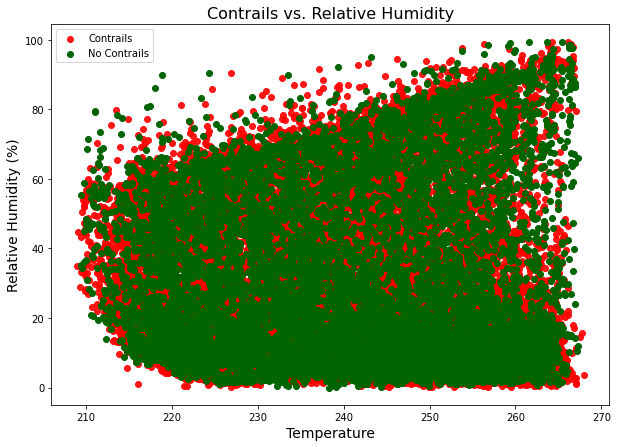

In [4]:
# Plot to see correlation
with_contrails = df[df['Image Present'] == 1]
without_contrails = df[df['contrailPresent'] == 0]

# Create the scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(with_contrails['Temperature'], with_contrails['Relative Humidity'], color='red', label='Contrails', alpha=.90)
plt.scatter(without_contrails['Temperature'], without_contrails['Relative Humidity'], color='darkgreen', label='No Contrails')

plt.xlabel('Temperature', size=14)
plt.ylabel('Relative Humidity (%)', size=14)
plt.title('Contrails vs. Relative Humidity', size=16)
plt.legend()
plt.show()

In [5]:
df['Timestamp']= pd.to_datetime(df['Timestamp'])
df.dtypes

Timestamp            datetime64[ns]
Level                       float64
Temperature                 float64
Relative Humidity           float64
altitude (ft)               float64
RH_ice                      float64
Image Present                 int64
contrailPresent               int64
dtype: object

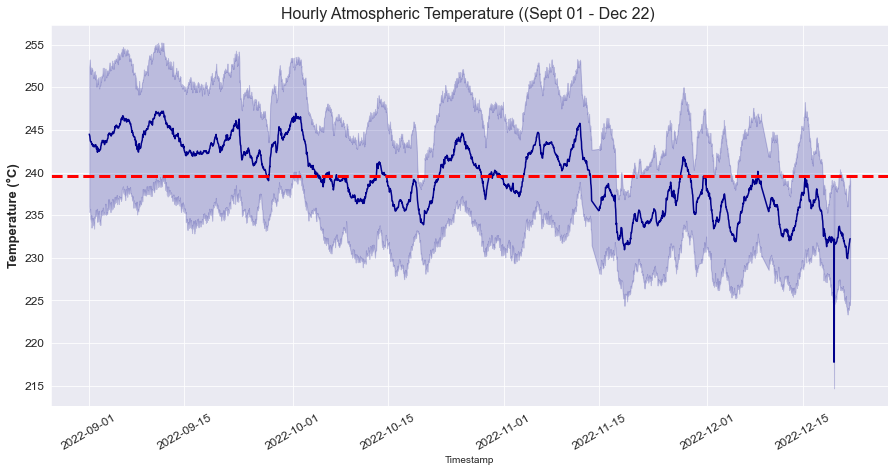

In [6]:
avg_TMP = df['Temperature'].mean()

x=df['Timestamp']
y=df['Temperature']

# Plot the temperature data for the entire dataset
plt.figure(figsize=(15, 7))
sns.set_style('darkgrid')
sns.lineplot(x=x, y=y, color='darkblue')
# Add the average line
plt.axhline(avg_TMP, color='red', linestyle='--', label='Average', lw='3')

# plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('Temperature (°C)', fontsize=13, fontweight='bold')
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hourly Atmospheric Temperature ((Sept 01 - Dec 22) ', fontsize=16, fontweight='400', fontfamily='Arial')

plt.show()


# Create Subsets to look at the data different Timestamps

In [7]:
df.index = pd.to_datetime(df.Timestamp)
df.head()

,Timestamp,Level,Temperature,Relative Humidity,altitude (ft),RH_ice,Image Present,contrailPresent
Timestamp,,,,,,,,
2022-09-01 01:00:00,2022-09-01 01:00:00,500.0,267.690735,15.713322,18281.181,16.563252,1,1
2022-09-01 01:00:00,2022-09-01 01:00:00,475.0,264.653305,13.301727,19515.537,14.438120,1,1
2022-09-01 01:00:00,2022-09-01 01:00:00,450.0,261.224030,13.430310,20803.669,15.067961,1,1
2022-09-01 01:00:00,2022-09-01 01:00:00,425.0,257.661057,13.321499,22151.114,15.467765,1,1
2022-09-01 01:00:00,2022-09-01 01:00:00,400.0,254.068146,12.596693,23564.347,15.139751,1,1


In [8]:
# Create a subset for 4-week span with midnight data
start_date = pd.Timestamp('2022-09-01 00:00:00')
end_date = start_date + pd.DateOffset(weeks=4)
midnight_subset = df.between_time('00:00:00', '00:00:00').loc[start_date:end_date]
morning_subset = df.between_time('06:00', '06:00').loc[start_date:end_date]
afternoon_subset = df.between_time('12:00', '12:00').loc[start_date:end_date]
evening_subset = df.between_time('18:00', '18:00').loc[start_date:end_date]

In [9]:
mid_night_avg_TMP = midnight_subset['Temperature'].mean()

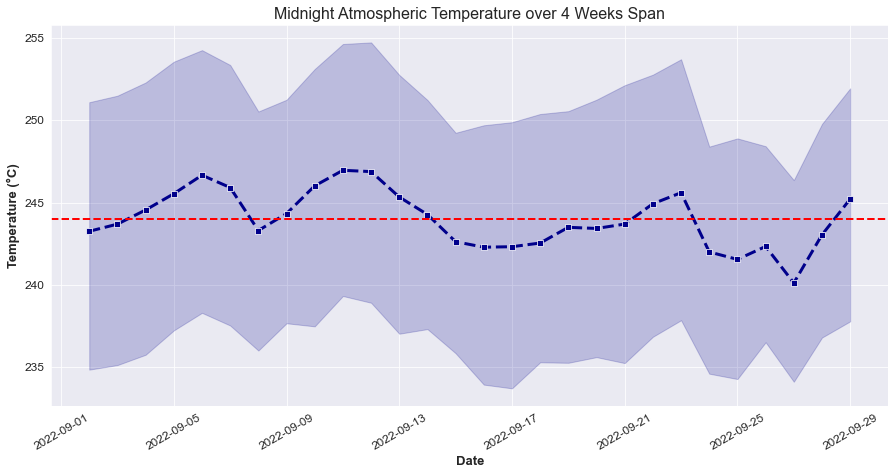

In [10]:
# Plot the temperature data
plt.figure(figsize=(15, 7))
sns.set_style('darkgrid')
sns.lineplot(data=midnight_subset['Temperature'], color='darkblue', ls='dashed', marker='s', lw='3')
plt.axhline(mid_night_avg_TMP, color='red', linestyle='--', label='Average', lw='2')

plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('Temperature (°C)', fontsize=13, fontweight='bold')
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Midnight Atmospheric Temperature over 4 Weeks Span', fontsize=16, fontweight='400', fontfamily='Arial')

plt.show()

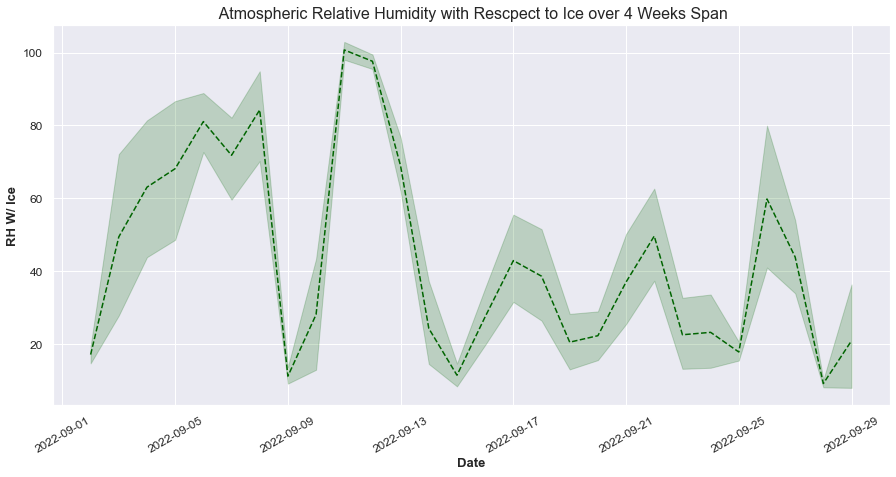

In [81]:
# Plot the Humidity data
plt.figure(figsize=(15, 7))
sns.set_style('darkgrid')
sns.lineplot(data=midnight_subset['RH_ice'], color='darkgreen', ls='dashed', marker='')

plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('RH W/ Ice', fontsize=13, fontweight='bold')
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.title(' Atmospheric Relative Humidity with Rescpect to Ice over 4 Weeks Span', fontsize=16, fontweight='400', fontfamily='Arial')


plt.show()

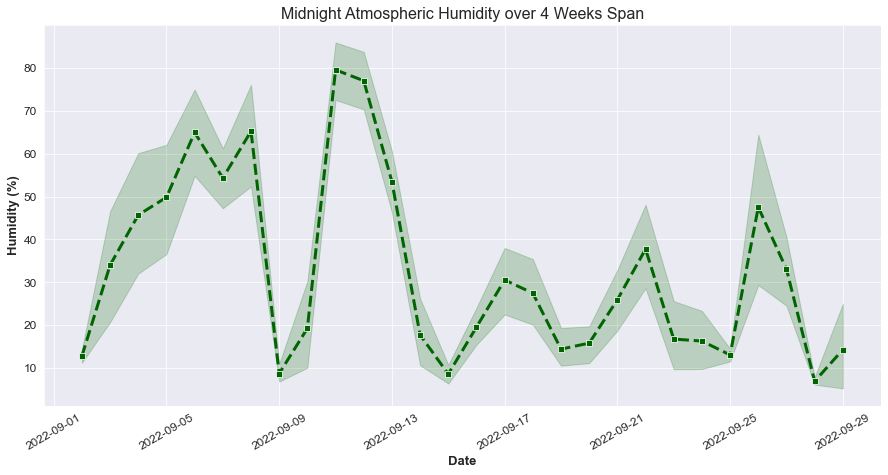

In [12]:
# Plot the temperature data
plt.figure(figsize=(15, 7))
sns.set_style('darkgrid')
sns.lineplot(data=midnight_subset['Relative Humidity'], color='darkgreen', ls='dashed', marker='s', lw='3')

plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('Humidity (%)', fontsize=13, fontweight='bold')
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Midnight Atmospheric Humidity over 4 Weeks Span', fontsize=16, fontweight='400', fontfamily='Arial')

plt.show()

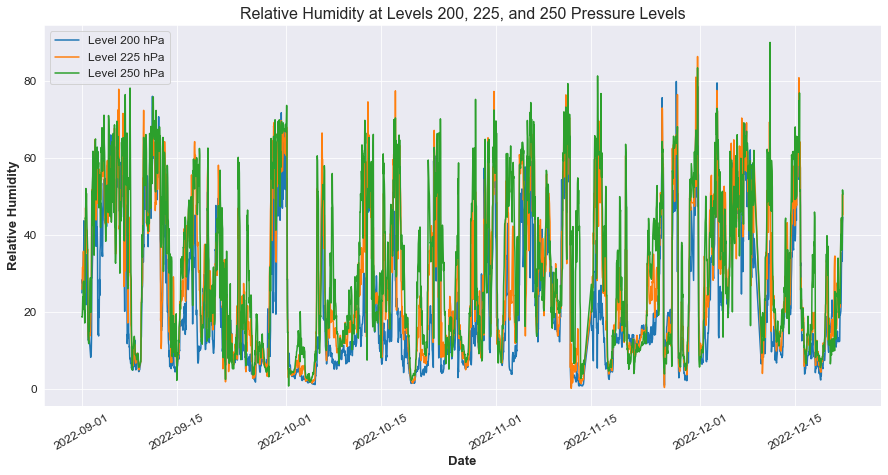

In [13]:
# Filter the DataFrame for levels 200, 225, and 250
level_200_data = df[df['Level'] == 200]
level_225_data = df[df['Level'] == 225]
level_250_data = df[df['Level'] == 250]


#plot timestamp at different timestamp
plt.figure(figsize=(15, 7))
sns.set_style('darkgrid')

sns.lineplot(data=level_200_data, x='Timestamp', y='Relative Humidity', label='Level 200 hPa')
sns.lineplot(data=level_225_data, x='Timestamp', y='Relative Humidity', label='Level 225 hPa')
sns.lineplot(data=level_250_data, x='Timestamp', y='Relative Humidity', label='Level 250 hPa')

plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('Relative Humidity', fontsize=13, fontweight='bold')
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Relative Humidity at Levels 200, 225, and 250 Pressure Levels', fontsize=16, fontweight='400', fontfamily='Arial')
plt.legend(fontsize=12)

plt.show()

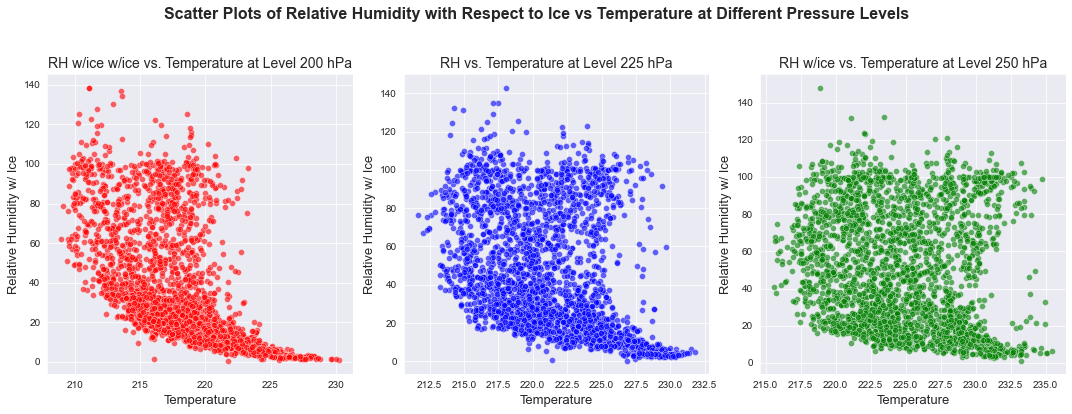

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for levels 200, 225, and 250
level_200_data = df[df['Level'] == 200]
level_225_data = df[df['Level'] == 225]
level_250_data = df[df['Level'] == 250]

# Set the figure size and spacing
plt.figure(figsize=(15, 6))
plt.subplots_adjust(wspace=0.5)


# Plot RH w/ice and Temperature for level 200
plt.subplot(1, 3, 1)
sns.scatterplot(data=level_200_data, x='Temperature', y='RH_ice', color='red', alpha=.60)
plt.xlabel('Temperature', fontsize=13, fontweight='normal')
plt.ylabel('Relative Humidity w/ Ice', fontsize=13, fontweight='normal')
plt.title('RH w/ice w/ice vs. Temperature at Level 200 hPa', fontsize=14, fontweight='normal')


# Plot RH w/ice and Temperature for level 225
plt.subplot(1, 3, 2)
sns.scatterplot(data=level_225_data, x='Temperature', y='RH_ice', color='blue', alpha=.60)
plt.xlabel('Temperature', fontsize=13, fontweight='normal')
plt.ylabel('Relative Humidity w/ Ice', fontsize=13, fontweight='normal')
plt.title('RH vs. Temperature at Level 225 hPa', fontsize=14, fontweight='normal')

# Plot RH w/ice and Temperature for level 250
plt.subplot(1, 3, 3)
sns.scatterplot(data=level_250_data, x='Temperature', y='RH_ice', color='green', alpha=.60)
plt.xlabel('Temperature', fontsize=13, fontweight='normal')
plt.ylabel('Relative Humidity w/ Ice', fontsize=13, fontweight='normal')
plt.title('RH w/ice vs. Temperature at Level 250 hPa', fontsize=14, fontweight='normal')

plt.suptitle('Scatter Plots of Relative Humidity with Respect to Ice vs Temperature at Different Pressure Levels', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


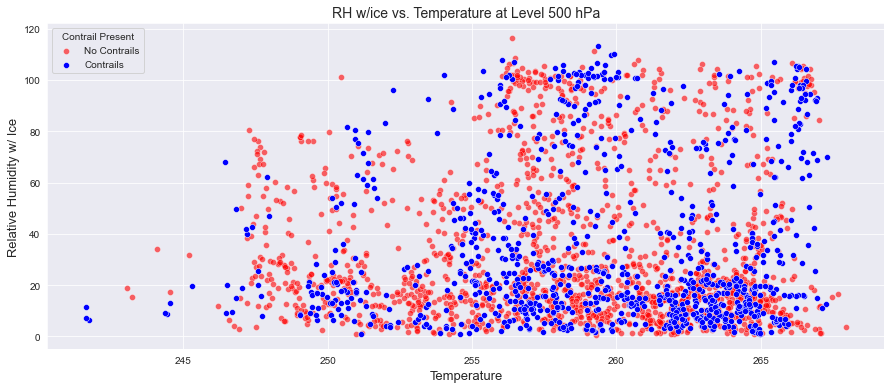

In [15]:
level_500_data = df[df['Level'] == 500]
contrails_500=level_500_data[level_500_data['contrailPresent'] == 1.0]
no_contrails_500=level_500_data[level_500_data['contrailPresent'] == 0.0]
# Plot RH w/ice and Temperature for level 200
plt.figure(figsize=(15, 6))
sns.scatterplot(data=contrails_500, x='Temperature', y='RH_ice', color='red', alpha=0.60)
sns.scatterplot(data=no_contrails_500, x='Temperature', y='RH_ice', color='blue')
plt.xlabel('Temperature', fontsize=13, fontweight='normal')
plt.ylabel('Relative Humidity w/ Ice', fontsize=13, fontweight='normal')
plt.title('RH w/ice vs. Temperature at Level 500 hPa', fontsize=14, fontweight='normal')
plt.legend(title='Contrail Present', labels=['No Contrails', 'Contrails'], fontsize=10)


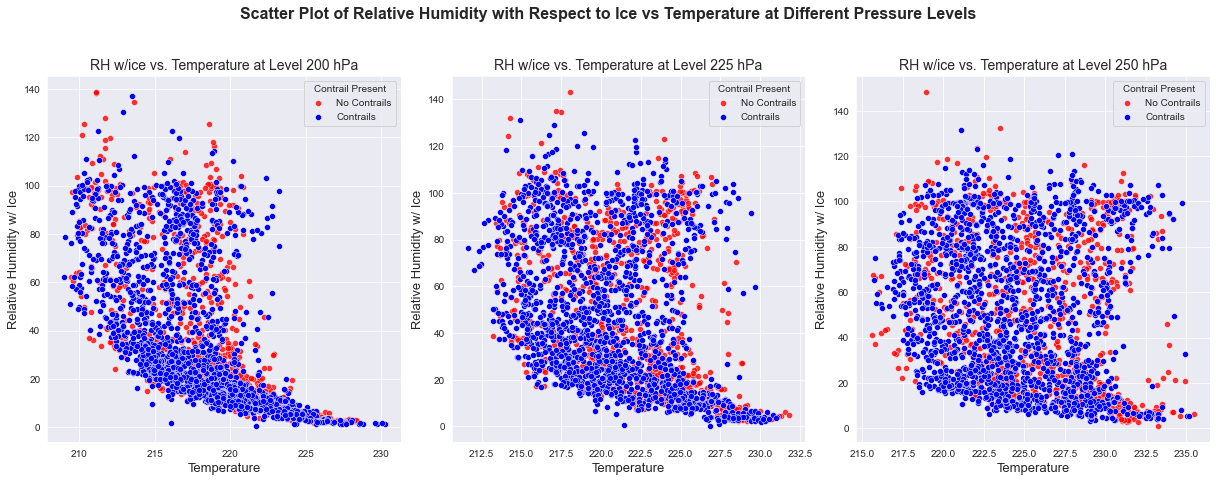

In [16]:

# Filter data for No Contrails and Contrails at each pressure level
no_contrails_200 = level_200_data[level_200_data['contrailPresent'] == 0.0]
no_contrails_225 = level_225_data[level_225_data['contrailPresent'] == 0.0]
no_contrails_250 = level_250_data[level_250_data['contrailPresent'] == 0.0]

contrails_200 = level_200_data[level_200_data['contrailPresent'] == 1.0]
contrails_225 = level_225_data[level_225_data['contrailPresent'] == 1.0]
contrails_250 = level_250_data[level_250_data['contrailPresent'] == 1.0]

# Set the figure size and spacing
plt.figure(figsize=(17, 7))
plt.subplots_adjust(wspace=0.5)

# # Plot RH w/ice and Temperature for level 200 
plt.subplot(1, 3, 1)
sns.scatterplot(data=no_contrails_200, x='Temperature', y='RH_ice', color='red', alpha=0.8)
sns.scatterplot(data=contrails_200, x='Temperature', y='RH_ice', color='blue')
plt.xlabel('Temperature', fontsize=13, fontweight='normal')
plt.ylabel('Relative Humidity w/ Ice', fontsize=13, fontweight='normal')
plt.title('RH w/ice vs. Temperature at Level 200 hPa', fontsize=14, fontweight='normal')
plt.legend(title='Contrail Present', labels=['No Contrails', 'Contrails'], fontsize=10)

# # Plot RH w/ice and Temperature for level 225 
plt.subplot(1, 3, 2)
sns.scatterplot(data=no_contrails_225, x='Temperature', y='RH_ice', color='red', alpha=0.8)
sns.scatterplot(data=contrails_225, x='Temperature', y='RH_ice', color='blue')
plt.xlabel('Temperature', fontsize=13, fontweight='normal')
plt.ylabel('Relative Humidity w/ Ice', fontsize=13, fontweight='normal')
plt.title('RH w/ice vs. Temperature at Level 225 hPa', fontsize=14, fontweight='normal')
plt.legend(title='Contrail Present', labels=['No Contrails', 'Contrails'], fontsize=10)

# Plot RH w/ice and Temperature for level 250
plt.subplot(1, 3, 3)
sns.scatterplot(data=no_contrails_250, x='Temperature', y='RH_ice', color='red', alpha=0.80)
sns.scatterplot(data=contrails_250, x='Temperature', y='RH_ice', color='blue')
plt.xlabel('Temperature', fontsize=13, fontweight='normal')
plt.ylabel('Relative Humidity w/ Ice', fontsize=13, fontweight='normal')
plt.title('RH w/ice vs. Temperature at Level 250 hPa', fontsize=14, fontweight='normal')
plt.legend(title='Contrail Present', labels=['No Contrails', 'Contrails'], fontsize=10)

plt.suptitle('Scatter Plot of Relative Humidity with Respect to Ice vs Temperature at Different Pressure Levels', fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


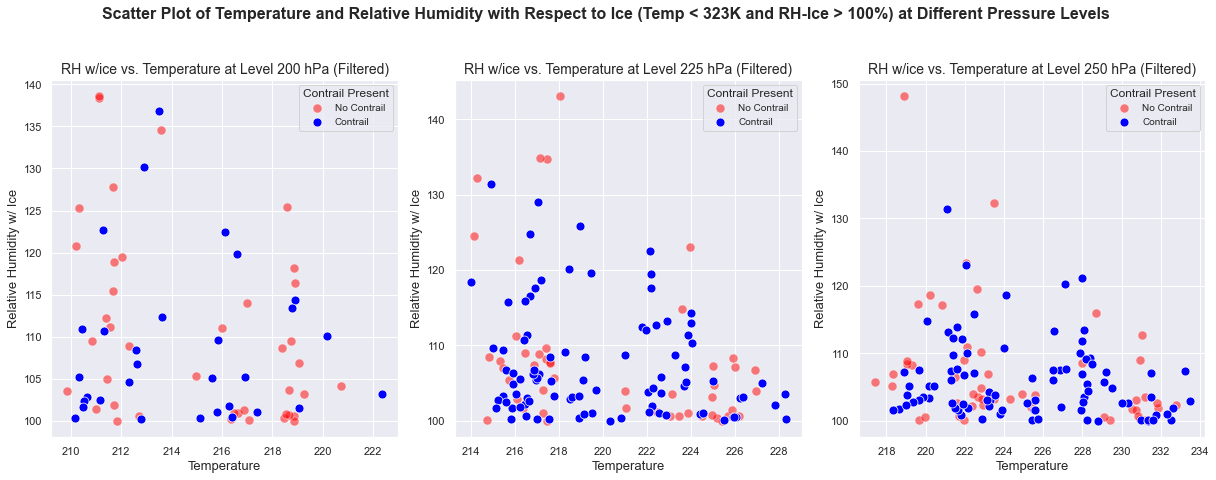

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the relevant columns

# Filter the DataFrame for levels 200, 225, and 250
level_200_data = df[df['Level'] == 200]
level_225_data = df[df['Level'] == 225]
level_250_data = df[df['Level'] == 250]

# Filter data for Temp < 323 Kelvin and RH-Ice > 100%
filtered_200_data = level_200_data[(level_200_data['Temperature'] < 323) & (level_200_data['RH_ice'] > 100)]
filtered_225_data = level_225_data[(level_225_data['Temperature'] < 323) & (level_225_data['RH_ice'] > 100)]
filtered_250_data = level_250_data[(level_250_data['Temperature'] < 323) & (level_250_data['RH_ice'] > 100)]

# Set the figure size and spacing
plt.figure(figsize=(17, 7))
plt.subplots_adjust(wspace=0.5)

# Plot Temp vs. RH-Ice for level 200 with Contrail and No Contrail separately
plt.subplot(1, 3, 1)
sns.scatterplot(data=filtered_200_data[filtered_200_data['contrailPresent'] == 0], x='Temperature', y='RH_ice', color='red', s=80, label='No Contrail', alpha=.50)
sns.scatterplot(data=filtered_200_data[filtered_200_data['contrailPresent'] == 1], x='Temperature', y='RH_ice', color='blue', s=80, label='Contrail')
plt.xlabel('Temperature', fontsize=13, fontweight='normal')
plt.ylabel('Relative Humidity w/ Ice', fontsize=13, fontweight='normal')
plt.title('RH w/ice vs. Temperature at Level 200 hPa (Filtered)', fontsize=14, fontweight='normal')
plt.legend(title='Contrail Present', fontsize=10)

# Plot Temp vs. RH-Ice for level 225
plt.subplot(1, 3, 2)
sns.scatterplot(data=filtered_225_data[filtered_225_data['contrailPresent'] == 0], x='Temperature', y='RH_ice', color='red', s=80, label='No Contrail', alpha=.50)
sns.scatterplot(data=filtered_225_data[filtered_225_data['contrailPresent'] == 1], x='Temperature', y='RH_ice', color='blue', s=80, label='Contrail')
plt.xlabel('Temperature', fontsize=13, fontweight='normal')
plt.ylabel('Relative Humidity w/ Ice', fontsize=13, fontweight='normal')
plt.title('RH w/ice vs. Temperature at Level 225 hPa (Filtered)', fontsize=14, fontweight='normal')
plt.legend(title='Contrail Present', fontsize=10)

# Plot Temp vs. RH-Ice for level 250
plt.subplot(1, 3, 3)
sns.scatterplot(data=filtered_250_data[filtered_250_data['contrailPresent'] == 0], x='Temperature', y='RH_ice', color='red', s=80, label='No Contrail', alpha=.50)
sns.scatterplot(data=filtered_250_data[filtered_250_data['contrailPresent'] == 1], x='Temperature', y='RH_ice', color='blue', s=80, label='Contrail')
plt.xlabel('Temperature', fontsize=13, fontweight='normal')
plt.ylabel('Relative Humidity w/ Ice', fontsize=13, fontweight='normal')
plt.title('RH w/ice vs. Temperature at Level 250 hPa (Filtered)', fontsize=14, fontweight='normal')
plt.legend(title='Contrail Present', fontsize=10)

plt.suptitle('Scatter Plot of Temperature and Relative Humidity with Respect to Ice (Temp < 323K and RH-Ice > 100%) at Different Pressure Levels', fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


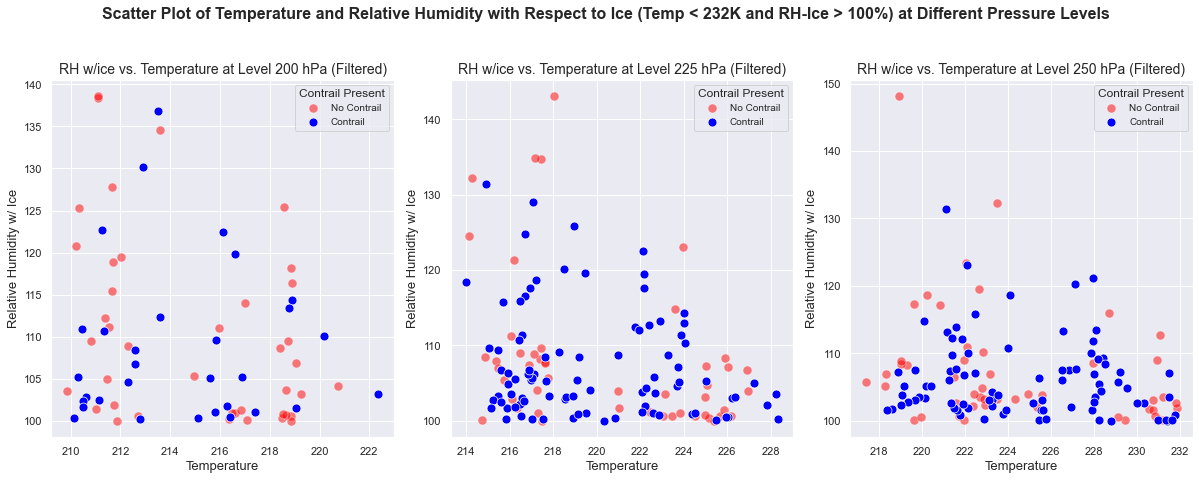

In [34]:
# Filter the DataFrame for levels 200, 225, and 250
level_200_data = df[df['Level'] == 200]
level_225_data = df[df['Level'] == 225]
level_250_data = df[df['Level'] == 250]

# Filter data for Temp < 323 Kelvin and RH-Ice > 100%
filtered_200_data1 = level_200_data[(level_200_data['Temperature'] < 232) & (level_200_data['RH_ice'] > 100)]
filtered_225_data1= level_225_data[(level_225_data['Temperature'] < 232) & (level_225_data['RH_ice'] > 100)]
filtered_250_data1 = level_250_data[(level_250_data['Temperature'] < 232) & (level_250_data['RH_ice'] > 100)]

# Set the figure size and spacing
plt.figure(figsize=(17, 7))
plt.subplots_adjust(wspace=0.5)

# Plot Temp vs. RH-Ice for level 200 with Contrail and No Contrail separately
plt.subplot(1, 3, 1)
sns.scatterplot(data=filtered_200_data1[filtered_200_data1['contrailPresent'] == 0], x='Temperature', y='RH_ice', color='red', s=80, label='No Contrail', alpha=.50)
sns.scatterplot(data=filtered_200_data1[filtered_200_data1['contrailPresent'] == 1], x='Temperature', y='RH_ice', color='blue', s=80, label='Contrail')
plt.xlabel('Temperature', fontsize=13, fontweight='normal')
plt.ylabel('Relative Humidity w/ Ice', fontsize=13, fontweight='normal')
plt.title('RH w/ice vs. Temperature at Level 200 hPa (Filtered)', fontsize=14, fontweight='normal')
plt.legend(title='Contrail Present', fontsize=10)

# Plot Temp vs. RH-Ice for level 225
plt.subplot(1, 3, 2)
sns.scatterplot(data=filtered_225_data1[filtered_225_data1['contrailPresent'] == 0], x='Temperature', y='RH_ice', color='red', s=80, label='No Contrail', alpha=.50)
sns.scatterplot(data=filtered_225_data1[filtered_225_data1['contrailPresent'] == 1], x='Temperature', y='RH_ice', color='blue', s=80, label='Contrail')
plt.xlabel('Temperature', fontsize=13, fontweight='normal')
plt.ylabel('Relative Humidity w/ Ice', fontsize=13, fontweight='normal')
plt.title('RH w/ice vs. Temperature at Level 225 hPa (Filtered)', fontsize=14, fontweight='normal')
plt.legend(title='Contrail Present', fontsize=10)

# Plot Temp vs. RH-Ice for level 250
plt.subplot(1, 3, 3)
sns.scatterplot(data=filtered_250_data1[filtered_250_data1['contrailPresent'] == 0], x='Temperature', y='RH_ice', color='red', s=80, label='No Contrail', alpha=.50)
sns.scatterplot(data=filtered_250_data1[filtered_250_data1['contrailPresent'] == 1], x='Temperature', y='RH_ice', color='blue', s=80, label='Contrail')
plt.xlabel('Temperature', fontsize=13, fontweight='normal')
plt.ylabel('Relative Humidity w/ Ice', fontsize=13, fontweight='normal')
plt.title('RH w/ice vs. Temperature at Level 250 hPa (Filtered)', fontsize=14, fontweight='normal')
plt.legend(title='Contrail Present', fontsize=10)

plt.suptitle('Scatter Plot of Temperature and Relative Humidity with Respect to Ice (Temp < 232K and RH-Ice > 100%) at Different Pressure Levels', fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


<AxesSubplot:xlabel='Temperature', ylabel='RH_ice'>

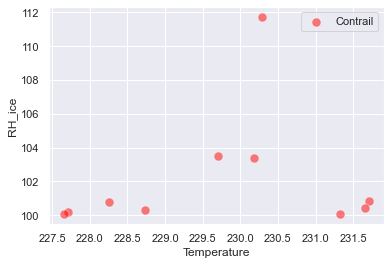

In [78]:
sns.scatterplot(data=df[(df['contrailPresent'] == 1) & (df['Level'] > 300) &  (df['Temperature'] <232) &  (df['RH_ice'] >100)], x='Temperature', y='RH_ice', color='red', s=80, label='Contrail', alpha=0.50)



In [33]:
filtered_200_data323 = level_200_data[(level_200_data['Temperature'] > 232) & (level_200_data['RH_ice'] > 100)]

In [31]:
print(max(filtered_200_data1.Temperature))  #where Temp >232
print(max(filtered_200_data.Temperature)) # where Temp >323

222.35513305664065
222.35513305664065


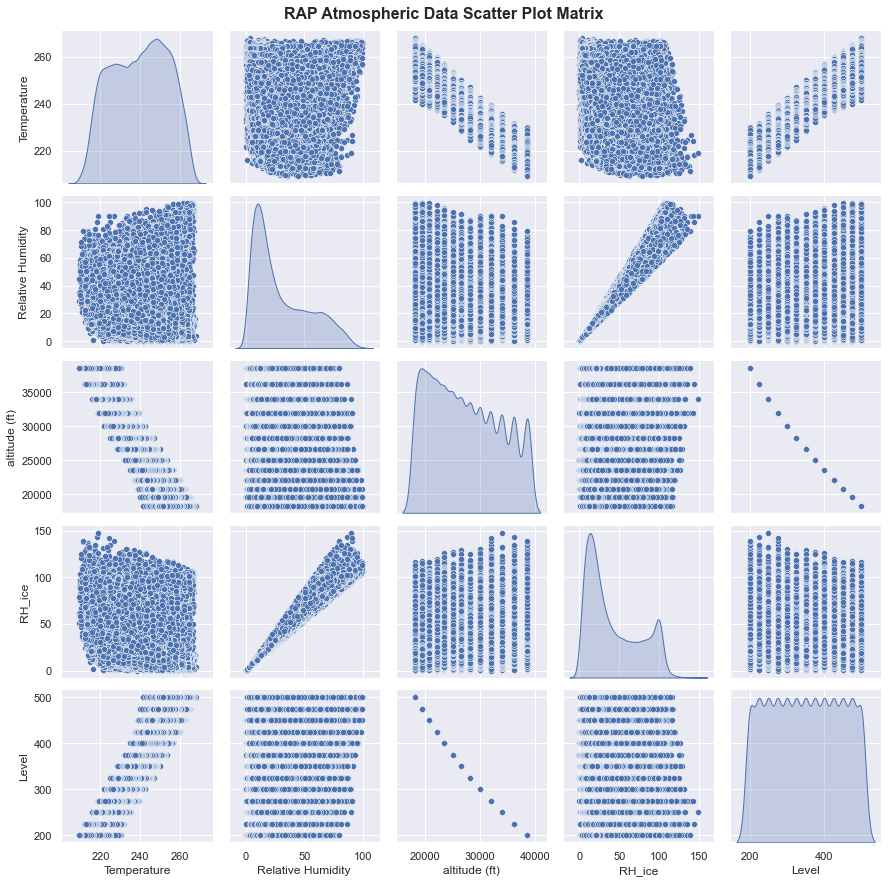

In [61]:

# Selecting the columns of interest
columns_of_interest = ['Temperature', 'Relative Humidity', 'altitude (ft)', 'RH_ice', 'Level']
data_for_pairplot = df[columns_of_interest]

# Create the scatter plot matrix
sns.set(style='darkgrid')
sns.pairplot(data_for_pairplot, diag_kind='kde', markers='o')

# Customize the plot
plt.suptitle('RAP Atmospheric Data Scatter Plot Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()

# Show the plot
plt.show()

